<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week6_programming_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [29]:
from sklearn.datasets import load_diabetes, make_regression
X, y = load_diabetes(return_X_y = True)
X, y = make_regression(n_samples=200, n_features=2, noise=10, random_state=42)
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [23]:
X, y = load_diabetes(return_X_y = True)
X.shape[0]

442

## Problem 2

How many features are there in the dataset?



## Solution

In [6]:
X.shape[1]

10

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.

Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [7]:
def shuffle_data(X, y):
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)
  return X[indices], y[indices]

X_shuffled, y_shuffled = shuffle_data(X, y)
mean_first_5 = np.mean(y_shuffled[:5])
mean_first_5

np.float64(180.4)

## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [8]:
def train_test_split(X, y, test_size):
  n = X.shape[0]
  test_samples = int(test_size * n)
  X_train = X[test_samples:]
  X_test = X[:test_samples]
  y_train = y[test_samples:]
  y_test = y[:test_samples]
  return X_train, X_test, y_train, y_test

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size)

sum_y_test = np.sum(y_test)
sum_y_test

np.float64(16779.0)

## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(332, 10)
(110, 10)
(332,)


(110,)

## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [10]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
X_train = X_train.T
X_test = X_test.T
print(X_train.shape)
X_test.shape

(11, 332)


(11, 110)

## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [11]:
def compute_weights(X, y):
  X_T = X.T
  weights = np.linalg.inv(X_T @ X) @ X_T @ y
  return weights

weights = compute_weights(X_train.T, y_train)
intercept = round(weights[0], 1)
intercept

np.float64(153.0)

## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [24]:
def MSE(X, y, w):
  """
  Computes the Mean Squared Error for given X, y, and weights w.

  Args:
    X: The input data matrix (with dummy feature if used).
    y: The true target vector.
    w: The weight vector.

  Returns:
    The Mean Squared Error.
  """
  y_pred = X.T @ w
  mse = np.mean((y_pred - y) ** 2)
  return mse

# Compute train error
train_error = MSE(X_train, y_train, weights)
print(f"Train Error: {train_error}")

# Compute test error
test_error = MSE(X_test, y_test, weights)
print(f"Test Error: {test_error}")

Train Error: 2772.566002063824
Test Error: 3205.7177135064812


## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [25]:
def compute_weights_ridge(X, y, alpha):
  """
  Computes the weights for Ridge regression using the closed form formula.

  Args:
    X: The input data matrix (with dummy feature as the first column).
    y: The true target vector.
    alpha: The regularization strength.

  Returns:
    The weight vector.
  """
  n_features = X.shape[0]  # Number of features including the dummy feature
  identity_matrix = np.identity(n_features)
  # Do not regularize the intercept term (the first weight)
  identity_matrix[0, 0] = 0

  weights_ridge = np.linalg.inv(X @ X.T + alpha * identity_matrix) @ X @ y
  return weights_ridge

alpha = 0.3
weights_ridge = compute_weights_ridge(X_train, y_train, alpha)

sum_weights_plain = np.sum(weights)
sum_weights_ridge = np.sum(weights_ridge)

reduction_in_sum = sum_weights_plain - sum_weights_ridge

print(f"Sum of weights (plain linear regression): {sum_weights_plain}")
print(f"Sum of weights (Ridge regression with alpha={alpha}): {sum_weights_ridge}")
print(f"Reduction in total sum of weights: {reduction_in_sum}")


Sum of weights (plain linear regression): 1358.0685020602698
Sum of weights (Ridge regression with alpha=0.3): 984.8648753092257
Reduction in total sum of weights: 373.2036267510441


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [26]:
# Compute train error for Ridge regression
train_error_ridge = MSE(X_train, y_train, weights_ridge)
print(f"Train Error (Ridge): {train_error_ridge}")

# Compute test error for Ridge regression
test_error_ridge = MSE(X_test, y_test, weights_ridge)
print(f"Test Error (Ridge): {test_error_ridge}")

# Absolute difference between train error and test error for Ridge regression
absolute_difference_errors_ridge = abs(train_error_ridge - test_error_ridge)
print(f"Absolute difference between train and test error (Ridge): {absolute_difference_errors_ridge}")

Train Error (Ridge): 2914.5165959382875
Test Error (Ridge): 3104.2932433552996
Absolute difference between train and test error (Ridge): 189.7766474170121


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



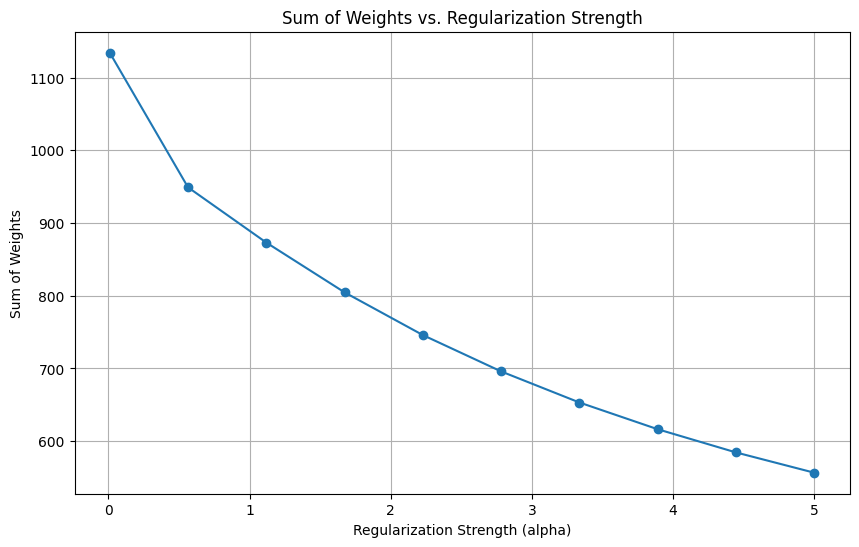

In [27]:
# Define a range of alpha values
alpha_values = np.linspace(0.01, 5, 10) # Use 10 values between 0 and 5

# Lists to store the sum of weights for each alpha
sum_of_weights_list = []

# Iterate through each alpha value, compute weights, and store the sum
for alpha in alpha_values:
  weights_ridge = compute_weights_ridge(X_train, y_train, alpha)
  sum_of_weights = np.sum(weights_ridge)
  sum_of_weights_list.append(sum_of_weights)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, sum_of_weights_list, marker='o', linestyle='-')
plt.xlabel("Regularization Strength (alpha)")
plt.ylabel("Sum of Weights")
plt.title("Sum of Weights vs. Regularization Strength")
plt.grid(True)
plt.show()